## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  86.231804  1210.213608  0.338943  1.718214  1.459624
1  14.788323  1328.859828  0.528680  2.843990  1.640654
2  71.845737   129.988828  0.057966  2.295742  0.124655
3  78.787516   761.436344  0.949754  4.325306  1.284842
4  30.619746   785.316498  0.742311  1.313482  1.359302


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 0.9332275	total: 63ms	remaining: 1m 2s
1:	learn: 0.9244149	total: 64.5ms	remaining: 32.2s
2:	learn: 0.9147107	total: 66ms	remaining: 21.9s
3:	learn: 0.9042703	total: 66.8ms	remaining: 16.6s
4:	learn: 0.8958054	total: 67.8ms	remaining: 13.5s
5:	learn: 0.8872495	total: 68.3ms	remaining: 11.3s
6:	learn: 0.8774348	total: 68.8ms	remaining: 9.76s
7:	learn: 0.8685874	total: 69.4ms	remaining: 8.6s
8:	learn: 0.8617706	total: 70ms	remaining: 7.71s
9:	learn: 0.8536618	total: 70.8ms	remaining: 7s
10:	learn: 0.8454035	total: 71.4ms	remaining: 6.42s
11:	learn: 0.8360891	total: 72.1ms	remaining: 5.94s
12:	learn: 0.8270747	total: 72.8ms	remaining: 5.53s
13:	learn: 0.8178367	total: 73.5ms	remaining: 5.18s
14:	learn: 0.8081014	total: 74.3ms	remaining: 4.88s
15:	learn: 0.8007070	total: 75ms	remaining: 4.61s
16:	learn: 0.7916493	total: 75.7ms	remaining: 4.37s


17:	learn: 0.7837086	total: 77.2ms	remaining: 4.21s
18:	learn: 0.7772973	total: 78.1ms	remaining: 4.03s
19:	learn: 0.7686710	total: 78.8ms	remaining: 3.86s
20:	learn: 0.7603596	total: 79.4ms	remaining: 3.7s
21:	learn: 0.7521828	total: 80.1ms	remaining: 3.56s
22:	learn: 0.7460715	total: 80.9ms	remaining: 3.44s
23:	learn: 0.7387211	total: 81.4ms	remaining: 3.31s
24:	learn: 0.7311183	total: 81.9ms	remaining: 3.19s
25:	learn: 0.7245882	total: 82.5ms	remaining: 3.09s
26:	learn: 0.7182089	total: 83ms	remaining: 2.99s
27:	learn: 0.7111763	total: 83.4ms	remaining: 2.9s
28:	learn: 0.7034964	total: 83.8ms	remaining: 2.81s
29:	learn: 0.6963643	total: 84.3ms	remaining: 2.73s
30:	learn: 0.6911891	total: 84.8ms	remaining: 2.65s
31:	learn: 0.6853548	total: 85.3ms	remaining: 2.58s
32:	learn: 0.6795067	total: 85.9ms	remaining: 2.52s
33:	learn: 0.6743791	total: 86.5ms	remaining: 2.46s
34:	learn: 0.6678355	total: 87.2ms	remaining: 2.4s
35:	learn: 0.6623519	total: 87.7ms	remaining: 2.35s
36:	learn: 0.6554

193:	learn: 0.2173733	total: 163ms	remaining: 678ms
194:	learn: 0.2160826	total: 164ms	remaining: 678ms
195:	learn: 0.2149333	total: 165ms	remaining: 675ms
196:	learn: 0.2137126	total: 165ms	remaining: 674ms
197:	learn: 0.2124847	total: 166ms	remaining: 671ms
198:	learn: 0.2113096	total: 166ms	remaining: 669ms
199:	learn: 0.2104665	total: 167ms	remaining: 666ms
200:	learn: 0.2091541	total: 167ms	remaining: 664ms
201:	learn: 0.2078663	total: 167ms	remaining: 661ms
202:	learn: 0.2069323	total: 168ms	remaining: 658ms
203:	learn: 0.2057823	total: 168ms	remaining: 656ms
204:	learn: 0.2049513	total: 169ms	remaining: 653ms
205:	learn: 0.2038853	total: 169ms	remaining: 651ms
206:	learn: 0.2030534	total: 169ms	remaining: 648ms
207:	learn: 0.2020737	total: 169ms	remaining: 645ms
208:	learn: 0.2011664	total: 170ms	remaining: 643ms
209:	learn: 0.2003865	total: 170ms	remaining: 641ms
210:	learn: 0.1997381	total: 171ms	remaining: 638ms
211:	learn: 0.1987501	total: 171ms	remaining: 636ms
212:	learn: 

343:	learn: 0.1239454	total: 232ms	remaining: 443ms
344:	learn: 0.1237864	total: 233ms	remaining: 442ms
345:	learn: 0.1236636	total: 234ms	remaining: 442ms
346:	learn: 0.1229453	total: 234ms	remaining: 441ms
347:	learn: 0.1228329	total: 235ms	remaining: 440ms
348:	learn: 0.1227221	total: 236ms	remaining: 440ms
349:	learn: 0.1220999	total: 236ms	remaining: 439ms
350:	learn: 0.1214057	total: 237ms	remaining: 438ms
351:	learn: 0.1207058	total: 237ms	remaining: 436ms
352:	learn: 0.1205907	total: 237ms	remaining: 435ms
353:	learn: 0.1204774	total: 238ms	remaining: 435ms
354:	learn: 0.1203337	total: 239ms	remaining: 434ms
355:	learn: 0.1197810	total: 240ms	remaining: 434ms
356:	learn: 0.1196710	total: 240ms	remaining: 432ms
357:	learn: 0.1191594	total: 240ms	remaining: 431ms
358:	learn: 0.1186637	total: 241ms	remaining: 431ms
359:	learn: 0.1185570	total: 242ms	remaining: 430ms
360:	learn: 0.1184519	total: 242ms	remaining: 429ms
361:	learn: 0.1177905	total: 243ms	remaining: 428ms
362:	learn: 

529:	learn: 0.0754375	total: 319ms	remaining: 283ms
530:	learn: 0.0752097	total: 320ms	remaining: 283ms
531:	learn: 0.0749843	total: 320ms	remaining: 282ms
532:	learn: 0.0748260	total: 321ms	remaining: 281ms
533:	learn: 0.0746053	total: 321ms	remaining: 280ms
534:	learn: 0.0744504	total: 322ms	remaining: 280ms
535:	learn: 0.0742986	total: 322ms	remaining: 279ms
536:	learn: 0.0741265	total: 322ms	remaining: 278ms
537:	learn: 0.0738193	total: 323ms	remaining: 277ms
538:	learn: 0.0734498	total: 323ms	remaining: 276ms
539:	learn: 0.0733003	total: 324ms	remaining: 276ms
540:	learn: 0.0730133	total: 324ms	remaining: 275ms
541:	learn: 0.0726540	total: 324ms	remaining: 274ms
542:	learn: 0.0725090	total: 325ms	remaining: 273ms
543:	learn: 0.0723670	total: 325ms	remaining: 273ms
544:	learn: 0.0722771	total: 326ms	remaining: 272ms
545:	learn: 0.0721891	total: 326ms	remaining: 271ms
546:	learn: 0.0720220	total: 326ms	remaining: 270ms
547:	learn: 0.0717472	total: 327ms	remaining: 269ms
548:	learn: 

682:	learn: 0.0462734	total: 387ms	remaining: 179ms
683:	learn: 0.0461264	total: 389ms	remaining: 180ms
684:	learn: 0.0460034	total: 389ms	remaining: 179ms
685:	learn: 0.0457856	total: 390ms	remaining: 178ms
686:	learn: 0.0456598	total: 390ms	remaining: 178ms
687:	learn: 0.0455736	total: 391ms	remaining: 177ms
688:	learn: 0.0454895	total: 391ms	remaining: 177ms
689:	learn: 0.0454075	total: 392ms	remaining: 176ms
690:	learn: 0.0452842	total: 392ms	remaining: 175ms
691:	learn: 0.0452041	total: 393ms	remaining: 175ms
692:	learn: 0.0451260	total: 393ms	remaining: 174ms
693:	learn: 0.0449727	total: 394ms	remaining: 174ms
694:	learn: 0.0448095	total: 395ms	remaining: 173ms
695:	learn: 0.0446591	total: 395ms	remaining: 173ms
696:	learn: 0.0445476	total: 396ms	remaining: 172ms
697:	learn: 0.0444717	total: 396ms	remaining: 171ms
698:	learn: 0.0444056	total: 397ms	remaining: 171ms
699:	learn: 0.0442580	total: 397ms	remaining: 170ms
700:	learn: 0.0441847	total: 398ms	remaining: 170ms
701:	learn: 

864:	learn: 0.0300519	total: 478ms	remaining: 74.6ms
865:	learn: 0.0300149	total: 478ms	remaining: 74ms
866:	learn: 0.0299910	total: 479ms	remaining: 73.5ms
867:	learn: 0.0298984	total: 480ms	remaining: 73ms
868:	learn: 0.0298556	total: 480ms	remaining: 72.4ms
869:	learn: 0.0298190	total: 481ms	remaining: 71.8ms
870:	learn: 0.0297767	total: 481ms	remaining: 71.3ms
871:	learn: 0.0296944	total: 482ms	remaining: 70.7ms
872:	learn: 0.0295462	total: 482ms	remaining: 70.1ms
873:	learn: 0.0295151	total: 483ms	remaining: 69.6ms
874:	learn: 0.0294917	total: 483ms	remaining: 69ms
875:	learn: 0.0294077	total: 484ms	remaining: 68.4ms
876:	learn: 0.0293847	total: 484ms	remaining: 67.9ms
877:	learn: 0.0293470	total: 484ms	remaining: 67.3ms
878:	learn: 0.0292726	total: 485ms	remaining: 66.7ms
879:	learn: 0.0292500	total: 485ms	remaining: 66.1ms
880:	learn: 0.0291960	total: 486ms	remaining: 65.6ms
881:	learn: 0.0290956	total: 486ms	remaining: 65ms
882:	learn: 0.0290733	total: 486ms	remaining: 64.5ms
8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.4014885861688896


ABC Pre-generator MAE 0.9570218043243907


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

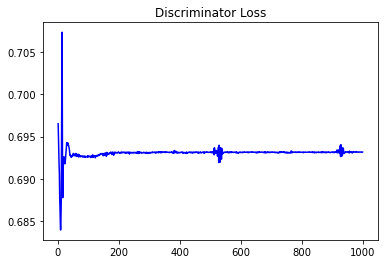

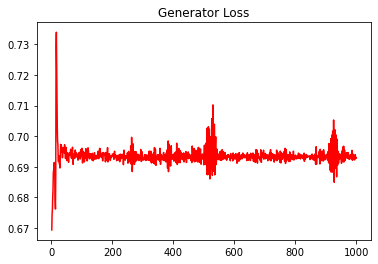

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.415265819972381


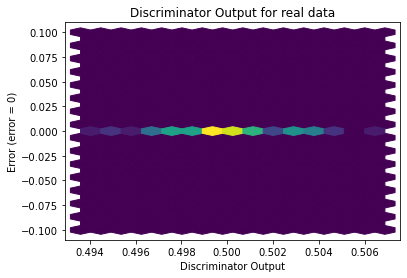

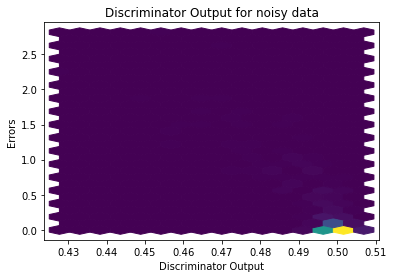

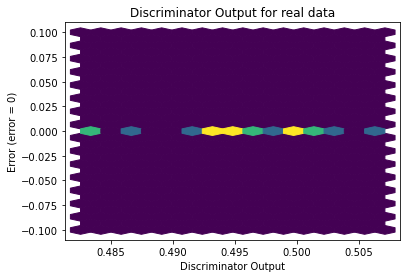

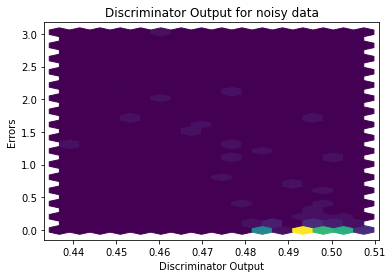

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

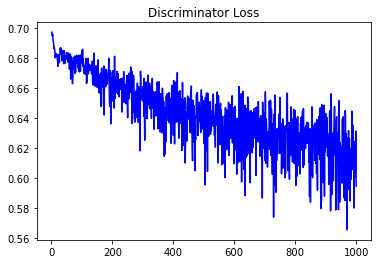

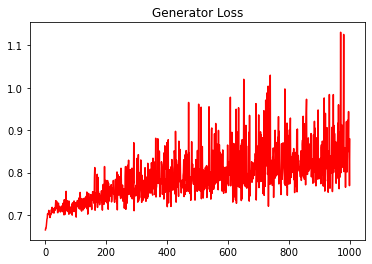

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.4629618182554841


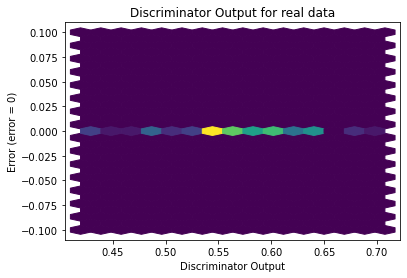

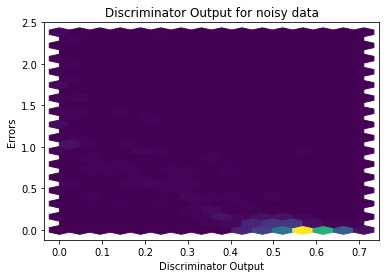

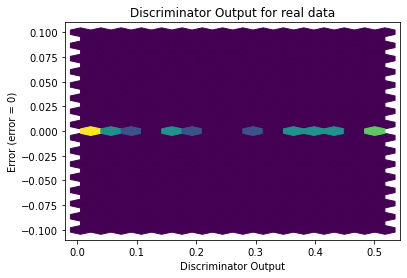

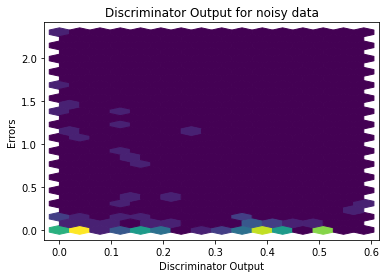

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


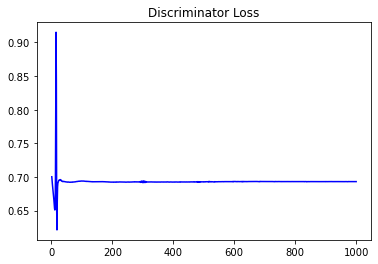

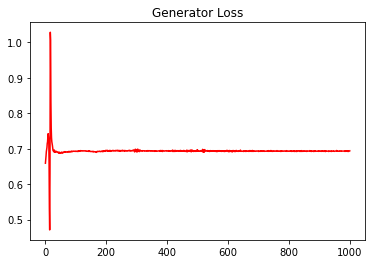

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.39954158547520635


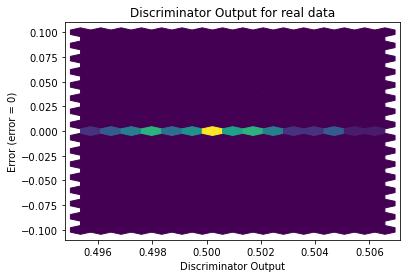

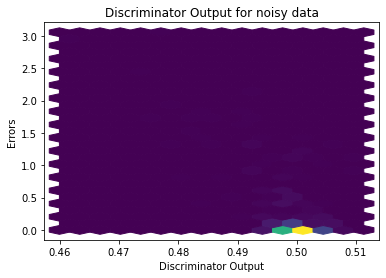

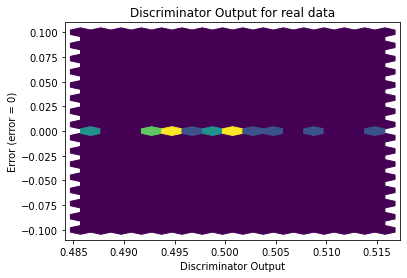

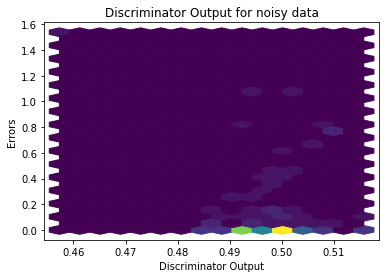

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


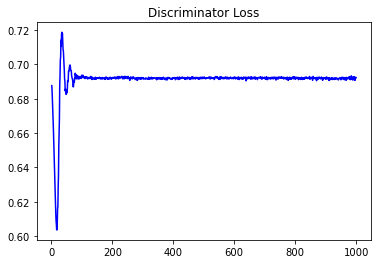

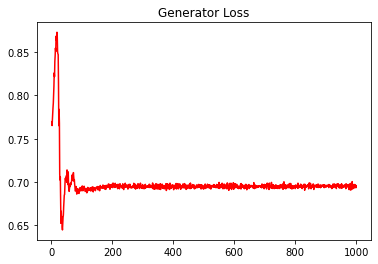

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.3862025922834873


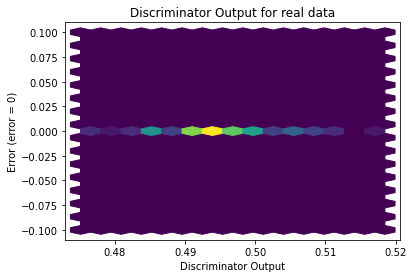

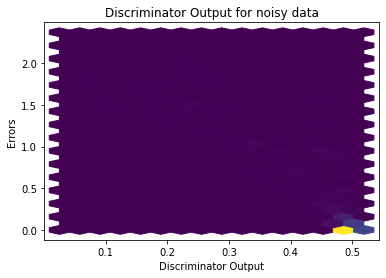

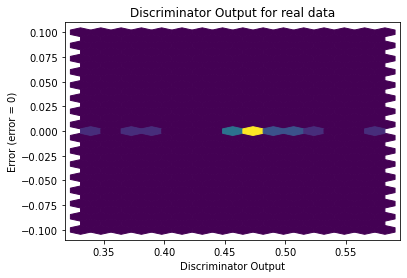

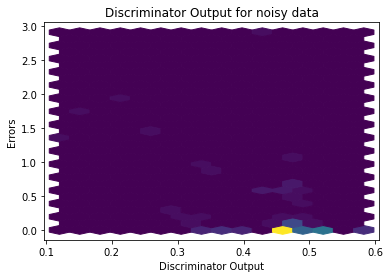

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0712]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1373]], requires_grad=True)
